# Variability of the inorganic carbon system in a large coastal lagoon of the southern Gulf of Mexico

### José Andrés Martínez-Trejo<sup>1</sup>, Jose-Gilberto Cardoso-Mohedano<sup>2,*</sup>, Joan Albert Sanchez-Cabeza<sup>3</sup>, José Martin Hernández Ayón<sup>4</sup>, Ana Carolina Ruiz-Fernández<sup> 3 </sup>, Mario Alejandro Gómez-Ponce <sup>2</sup> , Linda Barranco-Servín<sup>5</sup>, Daniel Pech<sup>5</sup>

<sup> 1 </sup> Posgrado en Ciencias del Mar y Limnología, Universidad Nacional Autónoma de México; Avenida Ciudad Universitaria 3000, C.P. 04510, Coyoacán, Ciudad de México, México

<sup> 2 </sup>  Estación el Carmen, Instituto de Ciencias del Mar y Limnología, Universidad Nacional Autónoma de México, Carretera Carmen-Puerto Real km. 9.5, 24157 Ciudad del Carmen, Campeche, México

<sup> 3 </sup>  Unidad Académica Mazatlán, Instituto de Ciencias del Mar y Limnología, Universidad Nacional Autónoma de México, Calzada Joel Montes Camarena s/n, Colonia Playa Sur, Mazatlán 82000, Sinaloa, México

<sup> 4 </sup>  Instituto de Investigaciones Oceanológicas, Universidad Autónoma de Baja California, Km. 103 CarreteraTijuana-Ensenada, Ensenada, Baja California, México

<sup> 5 </sup> Laboratorio de Biodiversidad Marina y Cambio Climático (BIOMARCCA), El Colegio de la Frontera Sur, Lerma, Campeche, México. 

 \*Corresponding Author: gcardoso@cmarl.unam.mx Phone:+52-938-38-31847

[doi:XXXXX](https://XXXX)


- Raw data are aviable in: 

https://metadata.icmyl.unam.mx/bitstream/handle/20.500.12201/11367/MartinezTrejo_etal_2023_TA_DIC_RawData.csv?sequence=1&isAllowed=y



- Read csv  data file

In [1]:
import pandas as pd
myCO2data = pd.read_csv("MartinezTrejo_etal_2023_TA_DIC_RawData.csv", sep=",", header=0,  decimal=".", encoding='utf-8')

- Calculate DIC / TA relation 

In [2]:
myCO2data["DIC/TA"]= myCO2data["DIC_micromol_kg"]/myCO2data["TA_micromol_kg"]

- PyCO2SYS configuration from estuarine waters (Humphreys et al. 2022)

In [3]:
import PyCO2SYS as pyco2
myCO2sysParamsDICTA_data = {
    # DIC measured in the lab in μmol/kg-sw
    "par1": myCO2data["DIC_micromol_kg"],
    # TA measured in the lab, Total scale
    "par2": myCO2data["TA_micromol_kg"],
    "par1_type": 2,         # tell PyCO2SYS: "par2 is a DIC value"
    "par2_type": 1,         # tell PyCO2SYS: "par1 is a TA value"
    # Fields conditions
    "salinity": myCO2data["Sal_psu"],  # in-situ salinity in PSU
    # in-situ temperature (output conditions) in °C
    "temperature_out": myCO2data["Temp_C"],
    "pressure_out": 0.0,
    # Settings
    "opt_pH_scale": 1,     # Total pH (Wolf-Gladrow et al. 2007)
    # 0 < T < 50 °C, 1 < S < 50, Seawater scale, real seawater (Millero F.J. 2010)
    "opt_k_carbonic": 14,
    "temperature": 25      # lab temperature (input conditions) in °C
}

- Run PyCO2SYS

In [4]:
CO2results= pyco2.sys(**myCO2sysParamsDICTA_data)

- Read intesring variables from CO2 results dictionary

In [5]:
myVarsDictonary = {"pH": CO2results["pH"],
       "OmegaAragonite": CO2results["saturation_aragonite"],
       "pCO2_atm":CO2results["pCO2_out"]}
myVars = pd.DataFrame.from_dict(myVarsDictonary, orient='columns')

- Concatenate CO2 results to pandas data frame

In [6]:
CarbonateTL = pd.concat([myCO2data, myVars], axis=1)

- Select Candelaria and Palizada results

In [7]:
CandelariaResult = CarbonateTL.loc[CarbonateTL["Estuary"] == "Candelaria"]
                     
PalizadaResult = CarbonateTL.loc[CarbonateTL["Estuary"] == "Palizada"]

- Scatter plot  with linear regretion

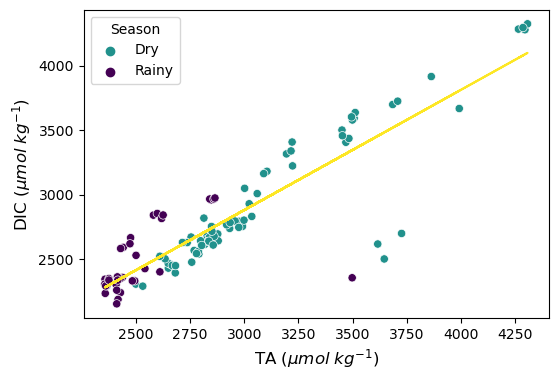

r-squared: 0.7784247010713174
Intercept: 80.30614134209554
Slope: 0.9329743239047245


In [9]:
import matplotlib.pyplot as plt
from scipy import stats

x = CarbonateTL['TA_micromol_kg']
y = CarbonateTL['DIC_micromol_kg']
import seaborn as sns



# Plot sepal width as a function of sepal_length across days
g = sns.scatterplot(
    data=CarbonateTL,
    x="TA_micromol_kg", y="DIC_micromol_kg", hue="Season",
    palette=dict(Dry="#21918c", Rainy="#440154")
)



#plt.scatter(x, y, label='original data', color = "#3b528b")

# Add labels and title
plt.xlabel('TA ($\mu mol  \; kg^{-1}$)', fontsize = 12)

plt.ylabel('DIC ($\mu mol  \; kg^{-1}$)', fontsize = 12)

# Calculate the linear regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Plot linear regression 

plt.plot(x, intercept + slope*x, '#fde725')

# set the figure size
plt.gcf().set_size_inches(6, 4)

# save the plot as a PDF file paper format 
plt.savefig('DIC_TA_pH.pdf', dpi=300, bbox_inches='tight')

plt.show()

# Print linear regression results 

print("r-squared:", r_value**2)
print("Intercept:", intercept)
print("Slope:", slope)



- Perform  least squares (OLS) regression

In [12]:
import statsmodels.api as sm

#define predictor and response variables
x = CarbonateTL['TA_micromol_kg']
y = CarbonateTL['DIC_micromol_kg']

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

# export model summary to text file
with open('TA_DIC_liner_model_summary.txt', 'w') as file:
    file.write(model.summary().as_text())

                            OLS Regression Results                            
Dep. Variable:        DIC_micromol_kg   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     365.4
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           8.18e-36
Time:                        13:56:31   Log-Likelihood:                -728.75
No. Observations:                 106   AIC:                             1462.
Df Residuals:                     104   BIC:                             1467.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             80.3061    144.021      0.

- Plot DIC,  Salinity and pH by Estuary 

- Plot DIC/TA ratio,  Salinity and pH by Estuary 

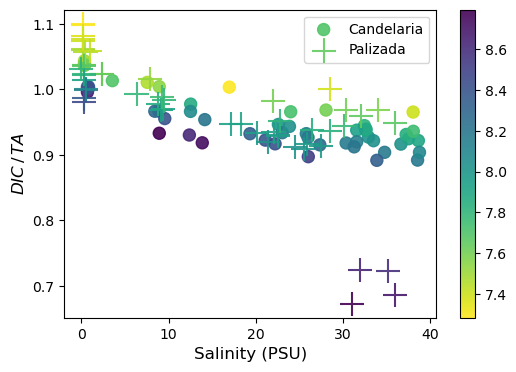

In [18]:
# Create the scatter plot 

# getting the original colormap using cm.get_cmap() function
orig_map = plt.colormaps.get_cmap('viridis')

# reversing the original colormap using reversed() function
reversed_map = orig_map.reversed()

scatter = plt.scatter(
    x=CandelariaResult["Sal_psu"], y=CandelariaResult["DIC_micromol_kg"]/CandelariaResult["TA_micromol_kg"], c=CandelariaResult["pH"], cmap=reversed_map,
    marker='.', s= 300, label='Candelaria', alpha=0.9)


scatter = plt.scatter(
    x=PalizadaResult["Sal_psu"], y=PalizadaResult["DIC_micromol_kg"] / PalizadaResult["TA_micromol_kg"], c=PalizadaResult["pH"], cmap=reversed_map,
    marker='+', s= 300, label='Palizada', alpha=0.9)


# Add a color bar
plt.colorbar(scatter)


# Add labels and title
plt.xlabel('Salinity (PSU)', fontsize = 12)
plt.ylabel("$DIC \, / \, TA $" , fontsize = 12)
plt.legend(loc='upper right')

# set the figure size
plt.gcf().set_size_inches(6, 4)

# save the plot as a PDF file
plt.savefig('sal_DICTA_pH.pdf', dpi=300, bbox_inches='tight')

plt.savefig('sal_DICTA_pH.tif', dpi=600) 

# display the plot
plt.show()



### Remove outlayers fron Palizada Estuary 

In [21]:


PalizadaResult_clean = PalizadaResult.loc[PalizadaResult["DIC/TA"]  > 0.8]


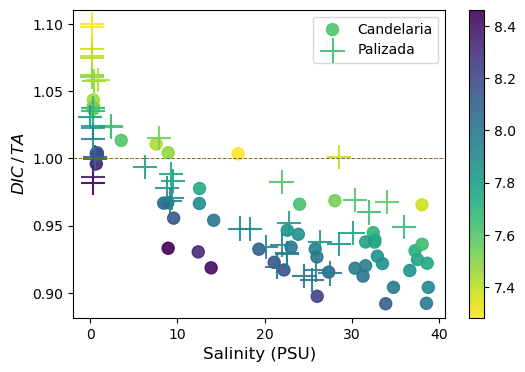

In [22]:
# Create the scatter plot 

scatter = plt.scatter(
    x=CandelariaResult["Sal_psu"], y=CandelariaResult["DIC_micromol_kg"]/CandelariaResult["TA_micromol_kg"], c=CandelariaResult["pH"], cmap=reversed_map,
    marker='.', s= 300, label='Candelaria', alpha=0.9)


scatter = plt.scatter(
    x=PalizadaResult_clean["Sal_psu"], y=PalizadaResult_clean["DIC_micromol_kg"] / PalizadaResult_clean["TA_micromol_kg"], c=PalizadaResult_clean["pH"], cmap=reversed_map,
    marker='+', s= 300, label='Palizada', alpha=0.9)


# Add a color bar
plt.colorbar(scatter)


# Add labels and title
plt.xlabel('Salinity (PSU)', fontsize = 12)
plt.ylabel("$DIC \, / \, TA $" , fontsize = 12)
plt.legend(loc='upper right')

plt.axhline(y=1, color='#8B6914', linestyle='--', linewidth=0.7)

# set the figure size
plt.gcf().set_size_inches(6, 4)

# save the plot as a PDF file
plt.savefig('sal_DICTA_pH_outlayers_removed.pdf', dpi=300, bbox_inches='tight')

# display the plot
plt.show()



# References
- Humphreys, M. P., Lewis, E. R., Sharp, J. D., & Pierrot, D. (2022). PyCO2SYS v1.8: Marine carbonate system calculations in Python. Geoscientific Model Development, 15(1), 15–43. https://doi.org/10.5194/gmd-15-15-2022
- Millero, F. J. (2010). Carbonate constants for estuarine waters. Marine and Freshwater Research, 61(2), 139. https://doi.org/10.1071/MF09254
- Wolf-Gladrow, D. A., Zeebe, R. E., Klaas, C., Körtzinger, A., & Dickson, A. G. (2007). Total alkalinity: The explicit conservative expression and its application to biogeochemical processes. Marine Chemistry, 106(1–2), 287–300. https://doi.org/10.1016/j.marchem.2007.01.006